Data visualization of time series

In [20]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq

#import pickle
#import scipy

In [21]:
dirname_lst = ['SleepEEG', 'Epilepsy', 'FD-A', 'FD-B', 'HAR', 'Gesture', 'ECG', 'EMG']

In [22]:
def open_dataset(path):
    #Loads in train, val and test datasets
    dall = {}
    train = torch.load(os.path.join(path+"train.pt"))
    val = torch.load(os.path.join(path+"val.pt"))
    test = torch.load(os.path.join(path+"test.pt"))
    dall.update(train)
    dall.update(val)
    dall.update(test)

    return dall

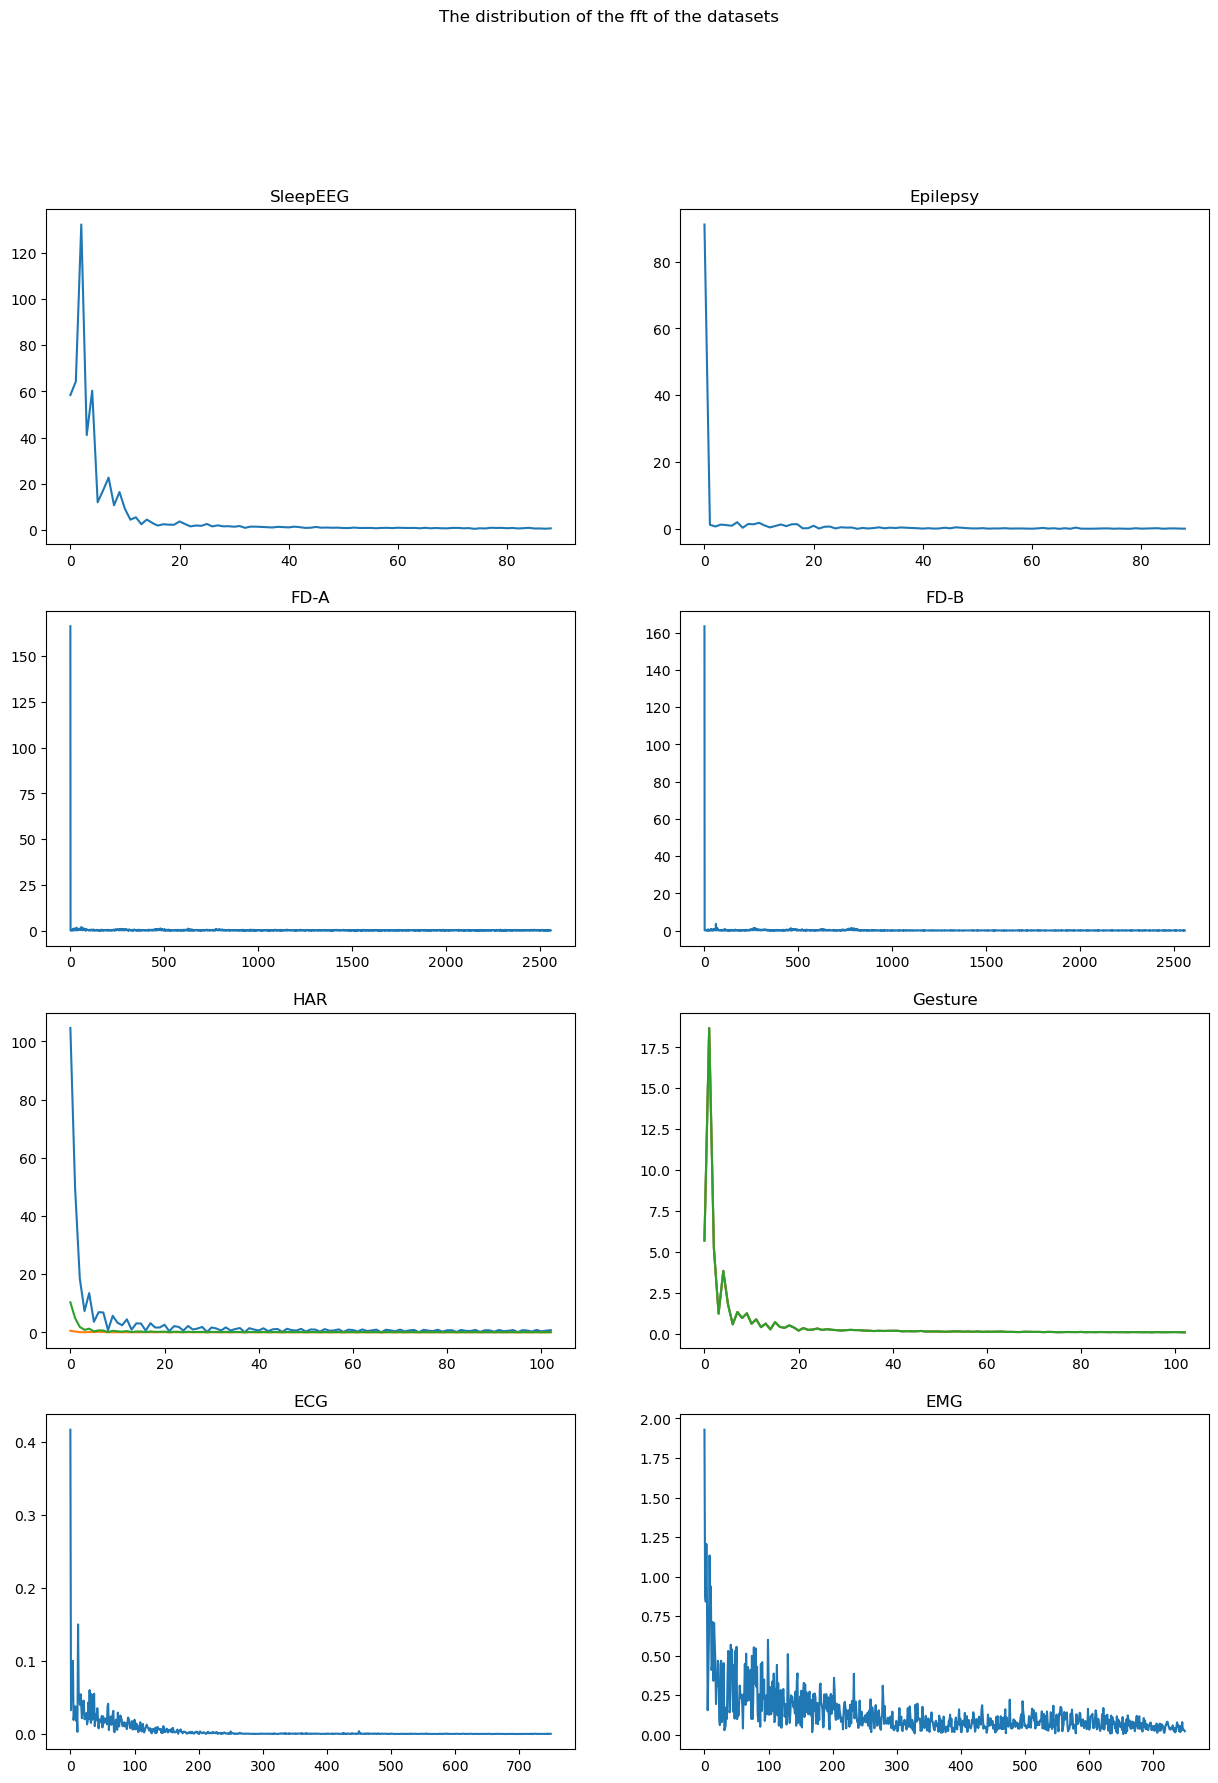

In [73]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

fig, axes = plt.subplots(4,2, figsize=(15,20), sharey=False)

fig.suptitle("The distribution of the fft of the datasets")
for dirname, ax in list(zip(dirname_lst, axes.flatten())):
    data_dict = open_dataset(f"datasets/{dirname}/")
    time_samples = np.array(data_dict['samples'][:,:,:])
    freq_samples = fft(time_samples)
    freq_samples = freq_samples.mean(axis=0)
    N = freq_samples.shape[1]
    xf = fftfreq(N, 1/N)[0:N//2]
    #rng = min(N//2 , 20)
    YF = np.abs(freq_samples[:,0:N//2])
    #xf = xf[0:rng]
    ax.set_title(f"{dirname}")
    for i in range(freq_samples.shape[0]):
        ax.plot(xf,YF[i,:])

In [49]:
path = "datasets/FD-A/"
sleep_eeg_train = open_dataset(path)
print(sleep_eeg_train['samples'][0,0,:])

[0.07629395 0.01220703 0.01525879 ... 0.04577637 0.0213623  0.03662109]


(2728, 1, 5120)


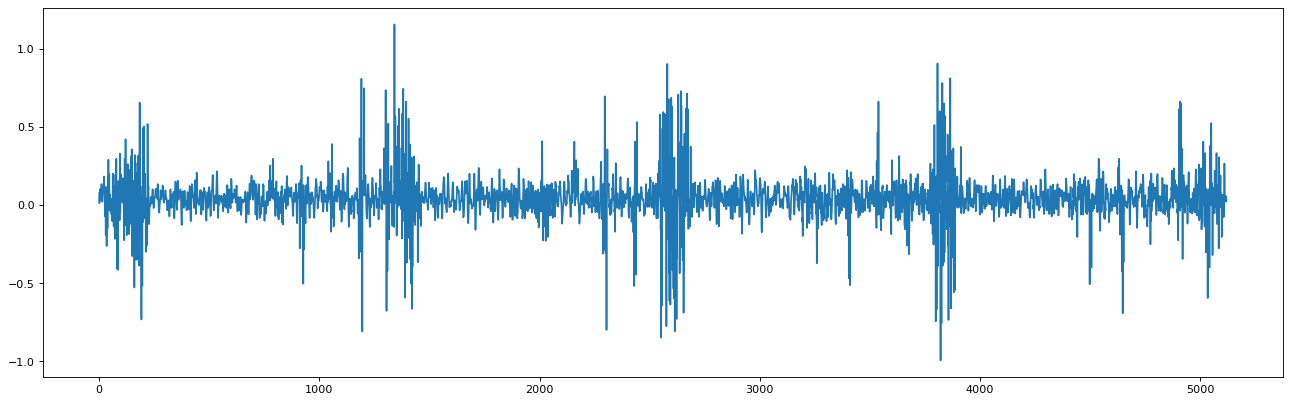

In [61]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

print(sleep_eeg_train['samples'].shape)

plt.plot(sleep_eeg_train['samples'][0,0,:])

In [51]:
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq

time_samples = np.array(sleep_eeg_train['samples'][:,:,:])
freq_samples = fft(time_samples)
print(freq_samples.shape)
freq_samples = freq_samples.mean(axis=0)
print(freq_samples.shape)

(2728, 1, 5120)
(1, 5120)


In [57]:
print(freq_samples[:,:])

[[ 1.66271308e+02+0.j          3.69849329e-02+0.095149j
  -1.06739881e-01-0.20171057j ...  2.64612275e-02-0.10582122j
  -1.06739881e-01+0.20171057j  3.69849329e-02-0.095149j  ]]


N:  5120
[[0.10208437 0.22821165 0.10907945 ... 0.33362403 0.16848411 0.06513345]]


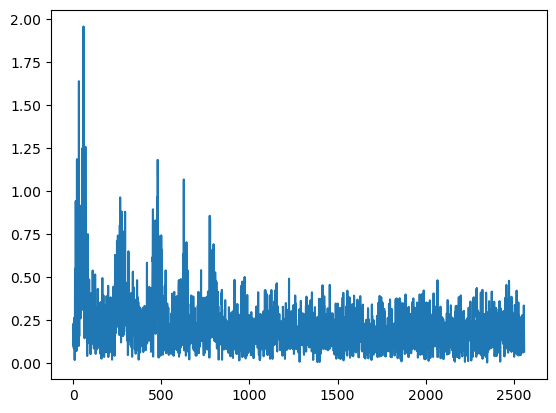

In [69]:
N = freq_samples.shape[1]
print("N: ", N)
xf = fftfreq(N, 1/N)[1:N//2]
YF = np.abs(freq_samples[:,1:N//2])
print(YF)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
plt.plot(xf,YF[0,:])
#plt.plot(xf,YF[1])
#plt.plot(xf,YF[2])